<a href="https://colab.research.google.com/github/Swastik02aug/unsupervised-netflix-project/blob/main/ML_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows: Clustering




##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name -Swastik Chaurasia**


# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Approaches:-

Step 1 - Viewing and cleaning data being the initials, we started with importing necessary libraries, mounting drive and storing data in variables for deriving meaningful insights. Next step being data analysis and visualization, where we analyzed our data distribution as univariate, bivariate and multivariate plots. Multicollinearity check was performed.

Step 2 - We performed 3 hypothesis testing one comparing means for two variavles using T-test , second was asssociation of target age and country using chi_square test, last was asssociation of target age and duration using chi_square test.

Step 3 - Presence of null values would have created possible errors in the further steps, so we replaced few values with null, few with the word "unknown" few were dropped.

Step 4 - As a part of feature engineering we have done textual data processing which includes:expand contraction, lower casing, removing punctuations and stopwords, normalization,and vectoriztion. We performed data scaling using standardscalar, and dimensionality reduction using PCA.

Step 5 - Last step was to perform clustering using different algorithms, we tried K-Means, ElbowCurve, DBSCAN, Dendogram, Agglomerative Clustering. Recommendation system function was also developed.

# **GitHub Link -**

Provide your GitHub Link here.
https://github.com/Swastik02aug/unsupervised-netflix-project/blob/main/ML_Submission.ipynb

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search.
In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.
Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, we are required to do Exploratory Data Analysis

Understanding what type content is available in different countries

Is Netflix has increasingly focusing on TV rather than movies in recent years.

Clustering similar content by matching text-based features.

Attribute Information Show_id : Unique ID for every Movie / Tv Show

Type : Identifier - A Movie or TV Show

Title : Title of the Movie / Tv Show

Director : Director of the Movie

Cast : Actors involved in the movie / show

Country : Country where the movie / show was produced

Date_added : Date it was added on Netflix

Release_year : Actual Releaseyear of the movie / show

Rating : TV Rating of the movie / show

Duration : Total Duration - in minutes or number of seasons

Listed_in : Genere

Description: The Summary description

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
!pip install xplotter --upgrade
!pip install pycountry-convert
!pip install geopy
!pip install folium
!pip install geopandas
###################
import pandas as pd
import numpy as np

import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.cm as cm



%matplotlib inline

# Importing Date & Time util modules
from dateutil.parser import parse

import collections as c


import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Importing Date & Time util modules
from dateutil.parser import parse

import collections as c


# Xplotter
from xplotter.insights import *
from xplotter.formatter import format_spines


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive/')



In [ ]:
df=pd.read_csv('/content/drive/MyDrive/unsupervised netflix project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head(10)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
#function for null values and missing values information
def null_info(df1):
  mv=df.isnull().sum()
  mv_percentage=mv*100/len(df)
  unique_value=df.nunique()
  ni_table=pd.concat([mv,mv_percentage,unique_value],axis=1)
  ni_table=ni_table.rename(columns={0:'no. of null values',1:'percentage of null value',2:'no. of unique values'})
  ni_table['data type']=df.dtypes
  ni_table=ni_table.sort_values('percentage of null value',ascending=False).round(1)
  print('data frame has '+ str(df1.shape[1])+" columns and "+ str(df.shape[0]),'rows')
  return ni_table

In [ ]:
null_info(df)

In [ ]:
# Visualizing the missing values

In [ ]:
import missingno as msno        #this library is used to visualised the the number of missing values
msno.bar(df)

### What did you know about your dataset?

-From the above we find that director,cast,contry,date_added and rating contain the null/missing values in it .And director contain highest no. of misssing values in it.

-There is no duplicated values present in the given data set.

-All the data have data types of 'objects' except 'release yeear' which is integers type.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe()

### Variables Description 

Frome the above we find that
 (Show_id-	Unique id for every movie/TV show,
 
 Release_year-	Actual release year of the show,

Type	Identifier - Movie/tv show,

Rating-	TV rating of the show,

Title-	Title of the show/movie	,	

Duration	-Total duration in minutes or number of seasons,

Director-	Director of the show,		

Listed_in-	Genre,

Cast-	Actors involved	,

Description	-Summary description,

Country	-Country of production,		

Date_added-	Date it was added on netflix.)


      

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
null_info(df)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#creting new feature which store  date,month,and year separetly.
#first we have to convert the 'date_added' in datetime format.
df['date_added']=pd.to_datetime(df['date_added'])
#day
df['day']=df['date_added'].dt.day
#month
df['month']=df['date_added'].dt.month
#year
df['year']=df['date_added'].dt.year


#  Creating two extra columns 
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

# duration manipulation for movie
movies.duration = movies.duration.str.replace(' min','').astype(int)

# duration manipulation for tv shows
tv_shows.rename(columns={'duration':'seasons'}, inplace=True)
tv_shows.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
tv_shows.seasons = tv_shows.seasons.str.replace(' Seasons','').astype(int)

# Splitting datasets for movies and tv show
df_movies = df[df['type']=='Movie'].copy()
df_shows = df[df['type']=='TV Show'].copy()
#fixing data type
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

df['type'] = pd.Categorical(df['type'])

# changing dtype to string
df['type']= df['type'].astype('string')
df['title']= df['title'].astype('string')
df['director']=df['director'].astype('string')
df['cast']=df['cast'].astype('string')
df['country']= df['country'].astype('string')
df['rating']= df['rating'].astype('string')
df['listed_in']= df['listed_in'].astype('string')
df['description']= df['description'].astype('string')


In [ ]:
df.head(10)

### What all manipulations have you done and insights you found?

-First we have to convert the date_added data type to datetime format.

-Split the date_added to day,month,year and create a separate columns.

-Here we separate the data into two categories on the basis of type. 

-In duration for movie min are get removed and used only integers.

-Similrly for tv shows seasons are removed and only integers vales are used.

-On the basis of rating, divide it into four categories kids,older kids,teens and adults.

-Converted all the data types in  string except date which is in datetime format.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Univariate analysis:**

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
# Balance of Netflix products
plot_donut_chart(df=df, col='type', colors=['blue','green'], title='Does Netflix had more \nMovies or TV Shows in 2019?')

##### 1. Why did you pick the specific chart?

Donut charts are the modified version of Pie Charts with the area of center cut out. A donut is more concerned about the use of area of arcs to represent the information in the most effective manner instead of Pie chart which is more focused on comparing the proportion area between the slices.

##### 2. What is/are the insight(s) found from the chart?

There are ~70% movies and ~30% are tv shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are more no. of movies with respect to tv shows ,if we see in term of business aspect we have to work on tv shows to make it more atttractive so that demand of tv shows are increses which leads to incresse the no. of tv shows.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
# Graph for top 10 actors
actors = df[df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = actors, order=actors.value_counts().index[:10], palette='Paired')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are explainable because of their linear data representation. we have used bar charts to represent dependent variable distribution, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

The above graph shows top 10 actors who have worked in lots of movies and TV shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it will help to cast a better actor  who have better experience,fan base and popularity.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
# Graph for top 10 directors
directors = df[df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = directors, order=directors.value_counts().index[:10], palette='Set2')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are explainable because of their linear data representation. we have used bar charts to represent dependent variable ditribution, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

This visual shows Jan suter and Raul Campos are the leading directors, with abundant experience.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it will help to choose a better and experience director for the movie and tv series.

#### Chart - 4

In [ ]:
# Chart - 4 visualization 
# #Analysing top10 genre of the movies/tv shows

sns.countplot(y=df['listed_in'],data=df,order=df['listed_in'].value_counts().index[0:10],  palette='Paired',)
plt.title('Top10 Genre of Movies/tv shows')

##### 1. Why did you pick the specific chart?

Bar charts are explainable because of their linear data representation. we have used bar charts to represent dependent variable ditribution, Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.

##### 2. What is/are the insight(s) found from the chart?

From the bar chart found that documentaries  fallowed by comedy and fallowed drama are the most popular genere of the tv shows as well as movies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it will helps to choose best genere to make movies as well as tv shows .

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
# Visualizing the year in which the movie / tv show was released


fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
sns.countplot(data =df,x = 'year',palette ="Set2")
plt.title('Movies added to Netflix each year ', fontsize=10)
plt.ylabel('No. of movies added to Netflix', fontsize=10)
plt.xlabel('Year -> (Movies added to Netflix) ', fontsize=10)

##### 1. Why did you pick the specific chart?

It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data

##### 2. What is/are the insight(s) found from the chart?

From the above find that highest no. of movies and tv shows are made in the years of 2019 and decreases in 2020 - 2021 due to covid.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it will to help to conclude that no. of making of movies and tv shows increases very fast from 2014 to 2019 after that due to the impact of covid it deceases very drastically.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
df[~(df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')

plt.title(' Top 10 countries with the highest number of shows')

##### 1. Why did you pick the specific chart?

Bar graph summarises the large set of data in simple visual form.
It displays each category of data in the frequency distribution.
It clarifies the trend of data better than the table.
It helps in estimating the key values at a glance.

##### 2. What is/are the insight(s) found from the chart?

From the above chart find that united states produces more no. of movies and tv shows fallowed by india and united kindom.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it will help to choose the best country for producing and making movies .

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
# Number of shows on Netflix for different age groups
plt.figure(figsize=(10,5))
a=df.rating.value_counts().plot(kind='barh',color='#7eb54e')
plt.title('Number of shows on Netflix for different age groups')

##### 1. Why did you pick the specific chart?

Bar graph summarises the large set of data in simple visual form. It displays each category of data in the frequency distribution. It clarifies the trend of data better than the table. It helps in estimating the key values at a glance.

##### 2. What is/are the insight(s) found from the chart?

From the given plot found the most of the shows and movies are made for adults audiences and fallowed by the young audiences ,older kids and kids.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it will help to creator to choose content according to the audience and made the movies and tv shows acoording to the interest of the audiences.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

plt.plot(figsize=(20, 5))
g1 = sns.distplot(movies.duration, color='blue');
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")




In [ ]:
plt.plot(figsize=(50, 100))
g2 = sns.distplot(tv_shows.seasons, color='blue');
g2.set_xticks(np.arange(0,16))
g2.set_title("Numbers of seasons of a tv shows")
g2.set_ylabel("% of All tv shows")
g2.set_xlabel("seasons")

##### 1. Why did you pick the specific chart?

Histograms have been used to represent distribution of columns having numerical data, histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.

##### 2. What is/are the insight(s) found from the chart?

Most of the movies have duration of 90 mins.
Most of the TV shows have one season, but this number goes on decreasing with increase in number seasons.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it will help to decide the length of the movies as well as no. of seasons for a tv shows.

### **Bivariate Analysis:**

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
#Analysing top15 countries with most content of mvies and tv shows separetely 
plt.figure(figsize=(18,5))
sns.countplot(x=df['country'],order=df['country'].value_counts().index[0:15],hue=df['type'], palette='Set2')
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

Multiple bar charts are extremely useful if you want to present a large amount of information in a small amount of space. Instead of having only one bar at each division on the horizontal axis.

##### 2. What is/are the insight(s) found from the chart?

Here: United States has highest number of contents in Netflix followed by India.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see that very large variety of content is not available for India and severl other countries thus missing variety should be made available for other countries to provide better options for audience and to increase engagement.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
# Building a wordcloud for the movie descriptions
words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for value in df.description.values:
    
    # typecaste each val to string
    value = str(value)

    # split the value
    tokens = value.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)


# plot the WordCloud image                      
plt.figure(figsize = (15,6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

##### 1. Why did you pick the specific chart?

A word cloud (also known as a tag cloud or text cloud) is a visual representation of a text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

##### 2. What is/are the insight(s) found from the chart?

 Family, Life, Find, Love are the most used words in the description column.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
# visualizing the movies and tv_shows based on the release year
movies_year =movies['year'].value_counts().sort_index(ascending=False)
tvshows_year =tv_shows['year'].value_counts().sort_index(ascending=False)
sns.set(font_scale=1.4)
movies_year.plot(figsize=(12, 8), linewidth=2.5, color='blue',label="Movies per year",ms=3)
tvshows_year.plot(figsize=(12, 8), linewidth=2.5, color='green',label="TV Shows per year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production growth yearly", y=1.02, fontsize=22);

##### 1. Why did you pick the specific chart?

It helps to show small shifts that may be getting hard to spot in other graphs.
It helps show trends for different periods.
They are easy to understand.
To compare data, more than one line can be plotted on the same axis.

##### 2. What is/are the insight(s) found from the chart?

In the year 2019 more number of movies were released as compared to TV shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are less number of TV shows available, therefore we should promote TV shows production to ensure better audience retention due to more duration and story complexity.

### **Multivariate Analysis:**

#### Chart - 12

In [ ]:
# Chart - 12 coorelation heatmap visualization code
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']
heatmap_df = df.loc[df['country'].isin(data)]
heatmap_df = pd.crosstab(heatmap_df['country'],heatmap_df['rating'],normalize = "index").T

# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']
sns.heatmap(heatmap_df.loc[age_order,country_order2],cmap='icefire',annot=True, linecolor='Black', linewidths=1.0,square=True, cbar=False,
            fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

Correlations are best represented using heat maps. Heat Maps is used to better visualize the volume of locations/events within a dataset and assist in directing viewers towards areas on data visualizations that matter most.

##### 2. What is/are the insight(s) found from the chart?

Maximum adult content is from Spain.

Maximum teen content is from India.

Maximum older kids content is from Japan.

Maximum kids content is from Canada.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it will help to create a specific content for a particular audience in a particular country.

#### Chart - 13

In [ ]:
# Pair Plot visualization code
# Checking relation among all the columns once to do further analysis 
sns.pairplot(data=df)

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

##### 2. What is/are the insight(s) found from the chart?

Movie release is not biased with respect to days or months, and no other relationship or trends can be observed from the pairplots.

# **For interactive dashboard-** [link text](https://public.tableau.com/views/Netflix_Movies__TV_shows_Clustering/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

## ***5. Hypothesis Testing***(The process of hypothesis testing is to draw inferences or some conclusion about the overall population or data by conducting some statistical tests on a sample.)

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis(H0) - The Country is independent of Target_ages.

Alternative Hypothesis(H1) - The Country is associated with Target_ages.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Making copy of df_clean_frame
hypothesis=df.copy()
hypothesis = hypothesis[hypothesis["type"] == "Movie"]
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
hypothesis['target_ages'] = hypothesis['rating'].replace(ratings_ages)
# Let's see unique target ages 
hypothesis['target_ages'].unique()
hypothesis['target_ages'] = pd.Categorical(hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
# From duration feature extractin string part and after extracting Changing the object type to numeric
hypothesis['duration']= hypothesis['duration'].str.extract('(\d+)')
hypothesis['duration'] = pd.to_numeric(hypothesis['duration'])
# Head of df_
hypothesis.head(3)
# Group_by duration and target_ages                 
group_by_= hypothesis[['duration','target_ages']].groupby(by='target_ages')
# Mean of group_by variable
group=group_by_.mean().reset_index()
group
# In A and B variable grouping values 
one = group_by_.get_group('Kids')
two = group_by_.get_group('Older Kids')
# Mean and std. calutation for kids and older kids variables
Mean1 = one.mean()
SD1 = one.std()

Mean2= two.mean()
SD2 = two.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(Mean1,Mean2))
print('Std deviation for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(SD2,SD1))

In [ ]:
# Perform Statistical Test to obtain P-Value
cont_table  = pd.crosstab(hypothesis.country, hypothesis.target_ages)
cont_table

In [ ]:
from scipy.stats import chi2_contingency
X2, p_value, degree_freedom, expected_values = chi2_contingency(cont_table, correction = True)
print("X2: {0}, P-Value: {1}".format(X2,p_value)) # IF P VALUE IS LESS THAN ALPHA VALUE(X2) THAN THERE IS ENOUGHT EVIDENCE TO REJECT NULL HYPOTHESIS

Thus we reject null hypothesis, Country is associated with target ages.

##### Which statistical test have you done to obtain P-Value?

chi-square test

##### Why did you choose the specific statistical test?

 A chi-square test is a statistical test used to compare observed results with expected results. The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis(H0) - The Duration is independent of Target_ages.

Alternative Hypothesis(H1) - The Duration is associated with Target_ages.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
cont_table_1  = pd.crosstab(hypothesis.target_ages, hypothesis.duration)
cont_table_1

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency
X2, p_value, degree_freedom, expected_values = chi2_contingency(cont_table_1, correction = True)
print("X2: {0}, P-Value: {1}".format(X2,p_value))  # IF P VALUE IS LESS THAN ALPHA VALUE(X2) THAN THERE IS ENOUGHT EVIDENCE TO REJECT NULL HYPOTHESIS

We reject the null hyposthesis, Duration is assosiated with target ages.

##### Which statistical test have you done to obtain P-Value?

Chi Square Test

##### Why did you choose the specific statistical test?

 A chi-square test is a statistical test used to compare observed results with expected results. The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 Hypothesis : Movies for kids and older kids are not two hours long.

H1 Hypothesis : Movies for kids and older kids are two hours long.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Import stats 
from scipy import stats
# Length of groups and DOF
len1 = len(one)
len2= len(two)
print(len1,len2)

dof = len1+len2-2
print('dof',dof)

sp_2 = ((len2-1)*SD1**2  + (len1-1)*SD2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

# t-value
t_value = (Mean1-Mean2)/(sp * np.sqrt(1/len1 + 1/len2))
print('t-value',t_value[0])

In [ ]:
stats.t.ppf(0.025,dof)

In [ ]:
stats.t.ppf(0.975,dof)   #If the absolute value of the t-value is greater than the critical value, THEN WE REJECT THE NULL HYPOTHESIS.

Thus we reject NUll hypothesis, movies for kids and older kids are two hours long.

##### Which statistical test have you done to obtain P-Value?

T-Test

##### Why did you choose the specific statistical test?

A t test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
null_info(df)

In [ ]:
df.dropna(subset=['date_added','day','year','month','rating'],inplace=True)
df['director'].fillna('unknown',inplace=True)
df['cast'].fillna('unknown',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

In [ ]:
null_info(df)

#### What all missing value imputation techniques have you used and why did you use those techniques?

-  'director','cast' null values are replaced by 'unknown' where as 'country' null values are replaced by most repeated country. And 'date_added','day','year','month','rating' null values are drop beacause the no. of null values are very small in comparion to data .

### 2. Textual Data Preprocessing :Text preprocessing is a crucial step in NLP. Cleaning our text data in order to convert it into a presentable form that is analyzable and predictable for our task is known as text preprocessing.
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction :Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe.

In [ ]:

# Expand ContractioN
df1=df[['title']]
df1['cluster_data'] =(df['description'] + ' ' +df['listed_in'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['rating']).astype(str)
df1.set_index('title', inplace = True)
df1.head()

#### 2. Lower Casing

In [ ]:
# Lower Casing
df1['cluster_data'] = df1['cluster_data'].str.lower()
df1['cluster_data']

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
def remove_punctuation(text):
  'a function is removing punctuation'
  import string
  translator=str.maketrans('','',string.punctuation)
  return text.translate(translator)

In [ ]:
df1['cluster_data']=df1['cluster_data'].apply(remove_punctuation)
df1.head()

#### 4. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
import nltk
nltk.download('stopword')
from nltk.corpus import stopwords
stop_words=stopwords.words('english')

In [ ]:
def stopwords(text):
  'a function is removing stop words'
  text=[word.lower() for word in text.split() if word.lower() not in stop_words]
  return " ".join(text)



In [ ]:
df1['cluster_data']=df1['cluster_data'].apply(stopwords)
df1.cluster_data.head()

#### 5. Text Normalization :Text normalization is the process of transforming text into a single canonical form that it might not have had before. Normalizing text before storing or processing it allows for separation of concerns, since input is guaranteed to be consistent before operations are performed on it.

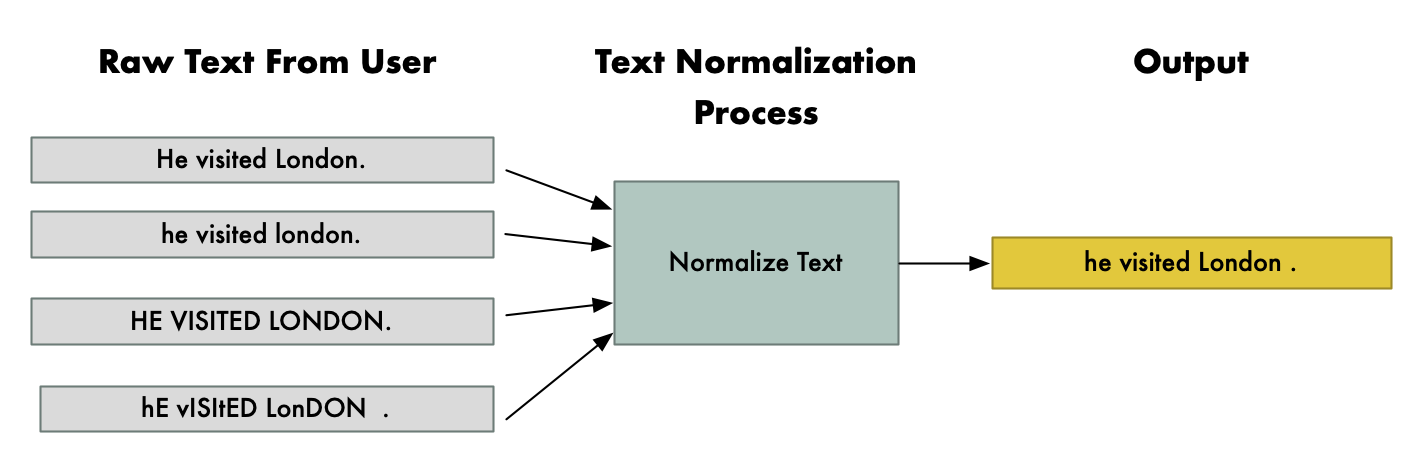

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
#creating an object for stemming function
stemmer=SnowballStemmer('english')
def stemming(text):
  'a fuction which steam each word in the given text'
  text=[stemmer.stem(word) for word in text.split()]
  return " ".join(text)

In [ ]:
df1['cluster_data']=df1['cluster_data'].apply(stemming)
df1.cluster_data.head()

In [ ]:
bag_of_words = df1.cluster_data

In [ ]:
df['Length(listed_in)'] = df['listed_in'].apply(lambda x: len(x))
df['Length(description)'] = df['description'].apply(lambda x: len(x))

df.head()

##### Which text normalization technique have you used and why?

We have used stemming for normalization of text. As Stemming removes last few characters from a word, often leading to incorrect meanings and spelling.

#### 6. Text Vectorization :Text Vectorization is the process of converting text into numerical representation. 

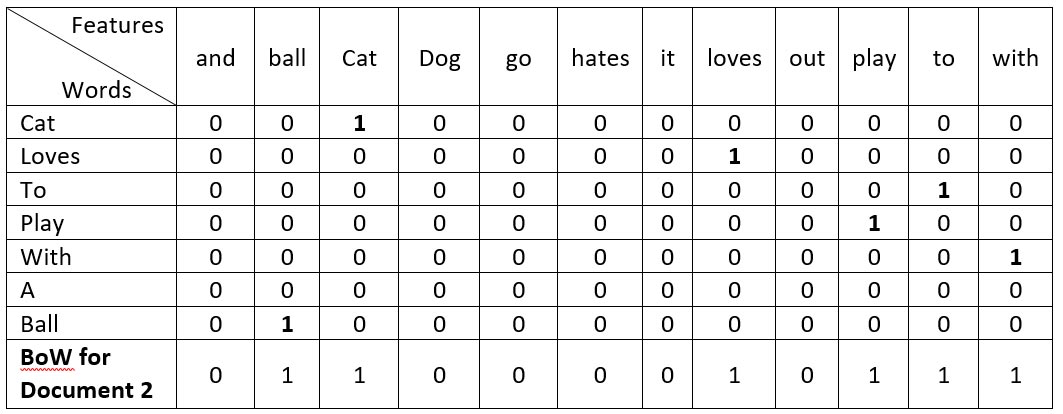

In [ ]:
# Vectorizing Text
df['description']=df['description'].fillna('')
tfidf=TfidfVectorizer(stop_words='english')

#tfidf matrix
tfidf_matrix=tfidf.fit_transform(df['description'])
tfidf_matrix.shape

##### Which text vectorization technique have you used and why?

TF-IDF will transform the text into meaningful representation of integers or numbers which is used to fit machine learning algorithm for predictions.

### 3. Data Scaling :This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points are, like support vector machines (SVM) or k-nearest neighbors (KNN).

In [ ]:
# Scaling your data
x_features=df[['Length(description)','Length(listed_in)']]
stdscaler=preprocessing.StandardScaler()
x_features.describe()

In [ ]:
#scaling of data

X_rescale=stdscaler.fit_transform(x_features)
X=X_rescale
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]

In [ ]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 2)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

##### Which method have you used to scale you data and why?

### 4. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimension reduction is very important as

Fewer features mean less complexity.

You will need less storage space because you have fewer data.

Fewer features require less computation time.

Model accuracy improves due to less misleading data.

Algorithms train faster thanks to fewer data.

Reducing the data set’s feature dimensions helps visualize the data faster.

It removes noise and redundant features.

In [ ]:
# DImensionality Reduction (If needed)
pca = PCA(random_state=42)
pca.fit(X)

In [ ]:
# Cumulative explained variance vs number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
# Reducing the dimensions using pca
pca = PCA(n_components=2,random_state=42)
pca.fit(X)
x_pca = pca.transform(X)

In [ ]:
# Shape of transformed vectors
x_pca.shape

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We have used Principle Component Analysis as the key aim of PCA is to reduce the number of variables of a data set, while preserving as much information as possible.

## ***7. ML Model Implementation***

### ML Model - 1 ( K means)
K-means is an iterative algorithm that splits a dataset into non-overlapping subgroups that are called clusters. The amount of clusters created is determined by the value of k – a hyperparameter that’s chosen before running the algorithm.



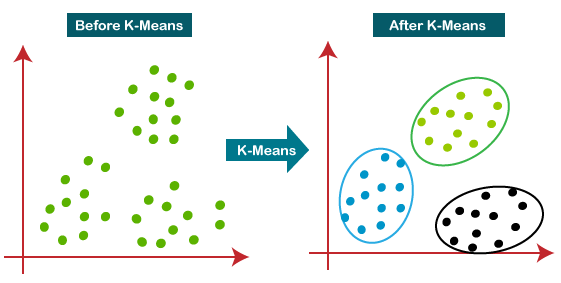


Steps involve:
 rovide the number of clusters (k) the algorithm must generate.

Randomly select k data points and assign each as a centroid of a cluster.

Classify data based on these centroids.

Compute the centroids of the resulting clusters.

Repeat the steps 3 and 4 until you reach a stopping condition.


In [ ]:
# ML Model - 1 K means
k_clusters = 4
# Fit the Algorithm
model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=42)
model.fit(X)
# Predict on the model
clusters = model.predict(X)

In [ ]:
# Evaluate the silhouette score :
score1 = silhouette_score(X, clusters)
print("Silhouette score is {}".format(score))

In [ ]:
# Adding a seperate column for the clusters L:
df["Cluster Label"] = clusters
df.head()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

temp = pd.DataFrame(silhouette_score_ , columns = ["n clusters" , "silhouette score"])
temp = temp.sort_values( "silhouette score" , ascending = False )
temp.head(15) 

In [ ]:
range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns :

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)


    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]

    ax1.set_xlim([-0.1, 1])

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.

    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    

    # Compute the silhouette scores for each sample :

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them :

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.hsv_r(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle :

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    #ax1.set_facecolor("white")
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.grid(False)

    # The vertical line for average silhouette score of all the values :

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed :

    colors = cm.hsv_r(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters :

    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers :

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

  

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    ax2.grid(False)
    #ax2.set_facecolor("white") :
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### ML Model - 2 ( Elbow Curve)

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:

# ML Model - 2 Implementation
sum_of_square_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_square_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters :

sns.pointplot(x = list(sum_of_square_dist.keys()), y = list(sum_of_square_dist.values()),color="red")
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# ML Model - 2 Implementation
kmeans = KMeans(n_clusters = 6 )
# fit the model
kmeans.fit(X)
# predict on the model
y_kmeans= kmeans.predict(X)

In [ ]:
# Evaluate the silhouette score :
score2 = silhouette_score(X, y_kmeans)
print("Silhouette score is {}".format(score))

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(14,10))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=60, cmap='rainbow')
plt.grid(color='r')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)


Observation : K-means clustering shows that '4' will be optimum no of clusters with the silhoutte score of 0.45. But we selected Optimum cluster number as 6 after Elbow curve cross validation.

### ML Model - 3( DBSCAN)
Clusters are dense regions in the data space, separated by regions of the lower density of points. The DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”. The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points. 

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=20).fit_predict(X)
plt.figure(figsize=(10,6))
plt.grid(color='r')
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

In [ ]:
# Evaluate the silhouette score :
score3 = silhouette_score(X, y_pred)
print("Silhouette score is {}".format(score))

Observation: DBSCAN algorithm identifies the dense region by grouping together data points that are close to eachother based on distance measurement. we observed that cluster is getting dense towards the centre, and is bit spreaded towards the extreme ends. Thus, it will not be suitable algorithm for clustering studies.

### ML Model - 4 ( Hierarchical clustering)

Hierarchical clustering is a popular method for grouping objects. It creates groups so that objects within a group are similar to each other and different from objects in other groups. Clusters are visually represented in a hierarchical tree called a dendrogram.

Hierarchical clustering has a couple of key benefits:

There is no need to pre-specify the number of clusters. Instead, the dendrogram can be cut at the appropriate level to obtain the desired number of clusters.
Data is easily summarized/organized into a hierarchy using dendrograms. Dendrograms make it easy to examine and interpret clusters.

In [ ]:
#  importing sch :
plt.figure(figsize=(14,10))
plt.style.use('default')
sch.set_link_color_palette(['#b30000','#996600', '#b30086'])
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'),above_threshold_color="green")
plt.axhline(y=70, color='r', linestyle='--')
# find largest vertical distance we can make without crossing any other horizontal line :
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show()

Observation: Here we can observe 3-4 major clusters and their smilarities.

### ML Model - 5 ( Agglomerative Clustering)

Agglomerative Clustering is also known as bottom-up approach or hierarchical agglomerative clustering (HAC). A structure that is more informative than the unstructured set of clusters returned by flat clustering. This clustering algorithm does not require us to prespecify the number of clusters. Bottom-up algorithms treat each data as a singleton cluster at the outset and then successively agglomerates pairs of clusters until all clusters have been merged into a single cluster that contains all data. 

In [ ]:
# Model 5 implementation
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
# predict on the model
y_hc = hc.fit_predict(X)

In [ ]:
# Evaluate the silhouette score :
score4 = silhouette_score(X, y_hc)
print("Silhouette score is {}".format(score))

In [ ]:
# Visualizing the clusters :
plt.figure(figsize=(14,10))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'yellow', label = '4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'black', label = '5')
plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'pink', label = '6')
plt.grid(color='r')
plt.title('Clusters of content')
plt.legend()
plt.show()

In [ ]:
print(f'The silhaut score of model 1 is {score1} ,model2 is {score2} ,model3 is {score3} and model5 is {score4}')

### 1. Which ML model did you choose from the above created models as your final prediction model and why?

For final prediction model i preffered to choose ' k-mean mdel' or model 1 .Because the silhaut score  model 1 is high in comparion to other model.

## ***8.*** ***Future Work (Optional)***

### **Recommendation System**:

A recommendation system is an artificial intelligence or AI algorithm, usually associated with machine learning, that uses Big Data to suggest or recommend additional products to consumers. These can be based on various criteria, including past purchases, search history, demographic information, and other factors.

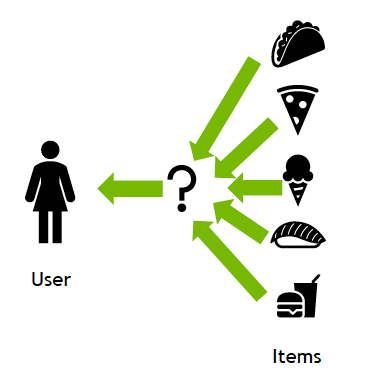

In [ ]:

pd.DataFrame(tfidf_matrix[0].T.todense(), columns=["tf-idf score"])


In [ ]:
#CountVectorizer: Convert a collection of text documents to a matrix of token counts
#TfidfTransformer: Transform a count matrix to a normalized tf or tf-idf representation

from sklearn.pipeline import Pipeline

pipe = Pipeline([('cv', CountVectorizer(stop_words='english')),
                ('tfid', TfidfTransformer())]).fit(df['description'])

print("CountVectorizer_matrix: {}".format(pipe['cv'].transform(df['description']).toarray()))
print("CountVectorizer_matrix: {}".format(pipe['tfid'].idf_))

In [ ]:
#The lower the IDF value of a word, the less unique it is to any particular document
pd.DataFrame(pipe['tfid'].idf_, columns=['idf_weights'])

**Cosine similarity recommender**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)

In [ ]:
programme_list=df['title'].to_list()

In [ ]:
def recommend(title, cosine_similarity=cosine_sim):
    index = programme_list.index(title)
    sim_score = list(enumerate(cosine_sim[index]))
    sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[1:11] #position 0 is the movie itself, thus exclude
    recommend_index = [i[0] for i in sim_score]
    rec_movie = df['title'].iloc[recommend_index]
    rec_score = [round(i[1],4) for i in sim_score]
    rec_table = pd.DataFrame(list(zip(rec_movie,rec_score)), columns=['Recommend programme','Similarity(0-1)'])
    return rec_table

In [ ]:
recommend("3 Idiots")

Here we can see that algorithm is accuratly recommending College Romance, Engineering girls which was basically theme of 3 idiots. Thus, the cluster is good.

In [ ]:
recommend("Indiana Jones and the Last Crusade")

Thus, recommendation is also giving smiliar title movies if sequels and prequels are available.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Netflix have ~70% of movies and 30% of TV_shows in 2019.

Comedy is most popular genre in Netflix, across all content.

Netflix focuses to add new content majorly towards end of current year and start of new year.

A sudden drop was obserbed after 2020 in count of new content, Which is because of covid pandemic.

India is on 2nd place as compared to content availability, maximum content is available for United states.

There are almost ~30% of netflix original movies and ~50 % TV-shows.
Content category and countries:

Maximum adult content is from Spain.

Maximum teen content is from India.

Maximum older kids content is from Japan.

Maximum kids content is from Canada.

All of this insights will be neccesary for business development and SWOT analysis.

Conclusion for clustering.

We tried 5 models for ML i.e.

K-means clustering

Elbow curve

DBSCAN

Hierarchical clustering

Agglomerative clustering

K-means clustering shows that '4' will be optimum no of clusters with the silhoutte score of 0.45. But we selected Optimum cluster number as 6 after Elbow curve cross validation.

Thus K-means clustering will be best for this data set.

Cosine based recommender system was working really well.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***